### 크롤링 데이터 불러오기

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

In [9]:
df = pd.read_csv('B072BCNRTY.csv', encoding="utf-8")
df.head()

,Title,Rating,Date,Content
0,This stand is perfect for Green Screens!,5.0,2021/08/27,I used this at my wedding and it was so perfec...
1,Great backdrop stand,5.0,2021/08/26,NaN
2,Easy to assemble best not to fully extend,5.0,2021/08/25,Seems pretty well made. When open to 9-10' it ...
3,Great investment piece!,4.0,2021/08/23,Took a gamble on this mid-priced backdrop stan...
4,Missing items,5.0,2021/08/23,Everything else looks good but I am missing 2 ...


In [127]:
df.shape

(3057, 4)

In [10]:
# 영어 문자만 남기고, 대문자는 소문자로 변환
df['Content1'] = df['Content'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', str(x)).lower())
df.head()

,Title,Rating,Date,Content,Content1
0,This stand is perfect for Green Screens!,5.0,2021/08/27,I used this at my wedding and it was so perfec...,i used this at my wedding and it was so perfec...
1,Great backdrop stand,5.0,2021/08/26,NaN,nan
2,Easy to assemble best not to fully extend,5.0,2021/08/25,Seems pretty well made. When open to 9-10' it ...,seems pretty well made when open to it ...
3,Great investment piece!,4.0,2021/08/23,Took a gamble on this mid-priced backdrop stan...,took a gamble on this mid priced backdrop stan...
4,Missing items,5.0,2021/08/23,Everything else looks good but I am missing 2 ...,everything else looks good but i am missing ...


### 별점 분석

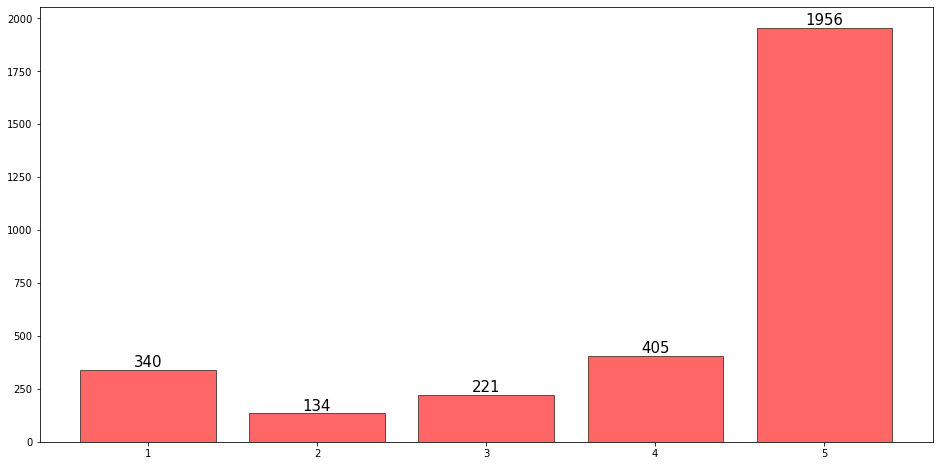

In [11]:
hist = pd.DataFrame(df.groupby('Rating').count()['Title'])
hist = hist.rename(columns={"Title":"리뷰 수"})

plt.figure(figsize=(16,8))

plt.bar(hist.index, hist['리뷰 수'], color='red',align='center',edgecolor='black', alpha=0.6)

for i, val in enumerate(hist.values):
    plt.text(i+1, val[0], val[0], fontsize=15, color='black', horizontalalignment='center', verticalalignment='bottom')
plt.show()


### 의미가 없는 불용어 제거
https://gsmesie692.tistory.com/110

In [12]:
# df['Content1']에서 결측치 제거
df = df.dropna()
df.head()

,Title,Rating,Date,Content,Content1
0,This stand is perfect for Green Screens!,5.0,2021/08/27,I used this at my wedding and it was so perfec...,i used this at my wedding and it was so perfec...
2,Easy to assemble best not to fully extend,5.0,2021/08/25,Seems pretty well made. When open to 9-10' it ...,seems pretty well made when open to it ...
3,Great investment piece!,4.0,2021/08/23,Took a gamble on this mid-priced backdrop stan...,took a gamble on this mid priced backdrop stan...
4,Missing items,5.0,2021/08/23,Everything else looks good but I am missing 2 ...,everything else looks good but i am missing ...
5,Love it so much! Easy to set up! Definitely n...,4.0,2021/08/22,Easy to set up. Love the tote bag for easy cle...,easy to set up love the tote bag for easy cle...


In [13]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jai19\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jai19\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [132]:
print(df['Content1'][0])

i used this at my wedding and it was so perfect   i highly recommend it 


In [14]:
stop_words = set(stopwords.words('english')) 

all_words = ""
for content in df['Content1']:
    all_words += content + " "

word_tokens = word_tokenize(all_words)

result = []
for w in word_tokens:
    if w not in stop_words:
        result.append(w)
        
print(word_tokens, '\n')



['i', 'used', 'this', 'at', 'my', 'wedding', 'and', 'it', 'was', 'so', 'perfect', 'i', 'highly', 'recommend', 'it', 'seems', 'pretty', 'well', 'made', 'when', 'open', 'to', 'it', 'says', 'a', 'little', 'if', 'the', 'back', 'drop', 'is', 'not', 'very', 'light', 'took', 'a', 'gamble', 'on', 'this', 'mid', 'priced', 'backdrop', 'stand', 'so', 'glad', 'i', 'did', 'already', 'used', 'it', 'more', 'that', 'x', 'and', 'will', 'continue', 'to', 'use', 'it', 'in', 'the', 'fall', 'holidays', 'everything', 'else', 'looks', 'good', 'but', 'i', 'am', 'missing', 'sandbags', 'my', 'backdrop', 'stand', 'is', 'not', 'sturdy', 'without', 'the', 'weight', 'please', 'send', 'them', 'asap', 'for', 'my', 'missing', 'items', 'easy', 'to', 'set', 'up', 'love', 'the', 'tote', 'bag', 'for', 'easy', 'clean', 'up', 'too', 'just', 'in', 'love', 'with', 'it', 'made', 'are', 'party', 'so', 'much', 'awsome', 'this', 'product', 'is', 'very', 'flimsy', 'ordered', 'this', 'for', 'a', 'birthday', 'party', 'backdrop', 'pi

In [15]:
print(result)

['used', 'wedding', 'perfect', 'highly', 'recommend', 'seems', 'pretty', 'well', 'made', 'open', 'says', 'little', 'back', 'drop', 'light', 'took', 'gamble', 'mid', 'priced', 'backdrop', 'stand', 'glad', 'already', 'used', 'x', 'continue', 'use', 'fall', 'holidays', 'everything', 'else', 'looks', 'good', 'missing', 'sandbags', 'backdrop', 'stand', 'sturdy', 'without', 'weight', 'please', 'send', 'asap', 'missing', 'items', 'easy', 'set', 'love', 'tote', 'bag', 'easy', 'clean', 'love', 'made', 'party', 'much', 'awsome', 'product', 'flimsy', 'ordered', 'birthday', 'party', 'backdrop', 'pieces', 'missing', 'short', 'use', 'ruined', 'whole', 'damn', 'evening', 'great', 'easy', 'assemble', 'careful', 'using', 'outdoors', 'used', 'sand', 'bads', 'still', 'staked', 'befor', 'blow', 'twice', 'two', 'different', 'times', 'great', 'buy', 'easy', 'install', 'used', 'backdrop', 'baby', 'shower', 'strong', 'enough', 'case', 'want', 'decorate', 'lot', 'stuff', 'needs', 'lot', 'support', 'order', 'ho

In [17]:
# result 총 단어 수 카운트
counts_result = Counter(result)

# counts_result
a = pd.DataFrame.from_dict(counts_result, orient='index').reset_index()
a

,index,0
0,used,292
1,wedding,65
2,perfect,230
3,highly,36
4,recommend,181
...,...,...
3886,paired,1
3887,contained,1
3888,downhill,1
3889,clamped,1


In [18]:
aa = a.rename(columns={"index":"words", 0:"counts"}).sort_values(by=['counts'], ascending=False)
aa

,words,counts
41,easy,970
60,great,709
50,product,557
25,use,540
19,backdrop,507
...,...,...
2578,babyshowers,1
1085,heeded,1
2576,bulky,1
2574,photograph,1


In [19]:
aa.sum()

words     easygreatproductusebackdropsetstandoneassemble...
counts                                                39762
dtype: object

### 워드 클라우드

In [162]:
!pip install wordcloud
!pip install matplotlib

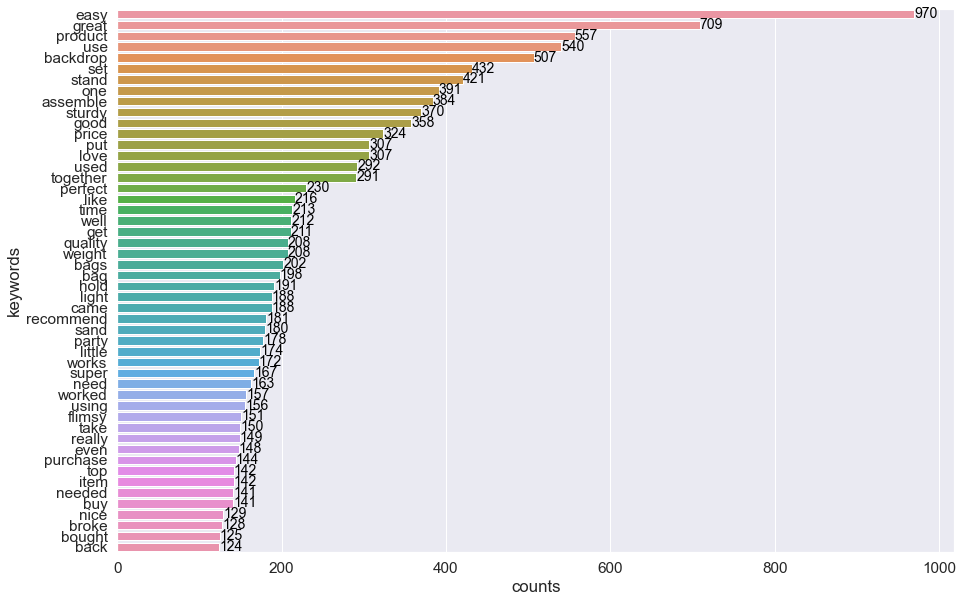

In [16]:
import sys
import seaborn as sns
from collections import Counter

sns.set(font_scale=1.4)

counts_selected = Counter(result)
counts_selected.most_common(51)
counts_df = pd.DataFrame(counts_selected.most_common(51))
counts_df.columns = ['keywords', 'counts']

counts_df = counts_df.drop([11])

plt.figure(figsize=(15,10))

counts_df = counts_df.groupby('keywords').sum().sort_values(by='counts', ascending=False).reset_index()

g = sns.barplot(x='counts', y='keywords', data=counts_df)

for index, row in counts_df.iterrows():
    g.text(row.counts, row.name, round(row.counts,2), fontsize=14, color='black', ha="left", verticalalignment='center')

In [166]:
counts_dff = pd.DataFrame(data = counts_selected, index=['words'])
counts_dff

counts_dff.sum()

used         292
wedding       65
perfect      230
highly        36
recommend    181
            ... 
paired         1
contained      1
downhill       1
clamped        1
skinner        1
Length: 3891, dtype: int64

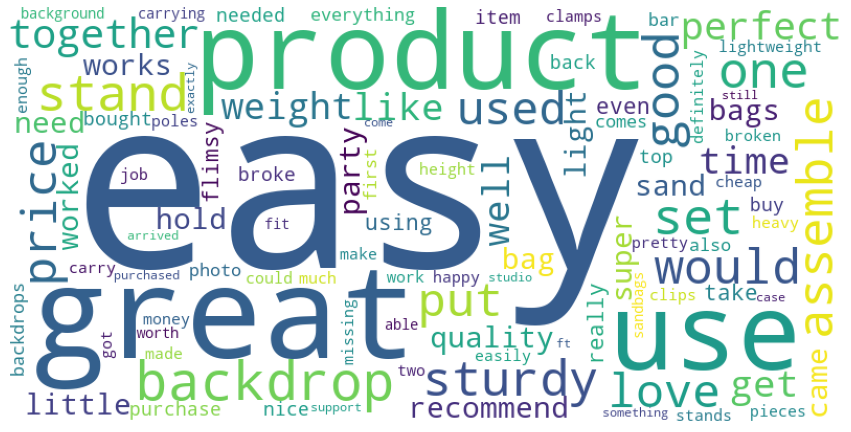

In [167]:
from wordcloud import WordCloud
import platform

wordcloud = WordCloud(background_color='white',
                     max_words=100,
                     relative_scaling=0.3,
                     width=800,
                     height=400).generate_from_frequencies(counts_selected)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('review.png')